In [21]:
#import libraries

import pandas as pd
import plotly.express as px
import numpy as np



In [22]:
#read in a Google sheet with Times Higher Education data (specify the sheet name)

# id is the string after d/ in the URL
gsheetid = "1X70-hPH-A0J9RmXcNqxe5LkhJ7qwa41LF2_3wYkcGtY"
#speficy the Google sheet name 
sheet_name = "Master"
gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid, sheet_name)
df = pd.read_csv(gsheet_url)

In [23]:
#Check data
df.sample(5)

,University,Country,Continent,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
250,University of Macau,China,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0
142,Utrecht University,Netherlands,Europe,143.0,68.0,67.0,74.0,79.0,62.0,86.0,68.0,74.0,75.0,75.0,69.0,66.0,NaN
112,Bilkent University,Turkey,Asia,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,Erasmus University Rotterdam,Netherlands,Europe,159.0,157.0,72.0,73.0,72.0,71.0,69.0,72.0,70.0,69.0,72.0,72.0,80.0,99.0
109,Seoul National University,South Korea,Asia,109.0,124.0,59.0,44.0,50.0,85.0,72.0,74.0,63.0,64.0,60.0,54.0,56.0,62.0


In [24]:
# clean up the data--- turn NaN into 201 (201 == outside the 200 list). Assign non major contients as other

df = df.fillna(201)
df['Continent'] = df['Continent'].replace('Africa', 'Other')
df['Continent'] = df['Continent'].replace('Oceania', 'Other')




In [25]:

z= "Country"  # specify whether you want to look at country or Continent 
cnt = df[z].value_counts().sort_index() #create a count of each country or contient


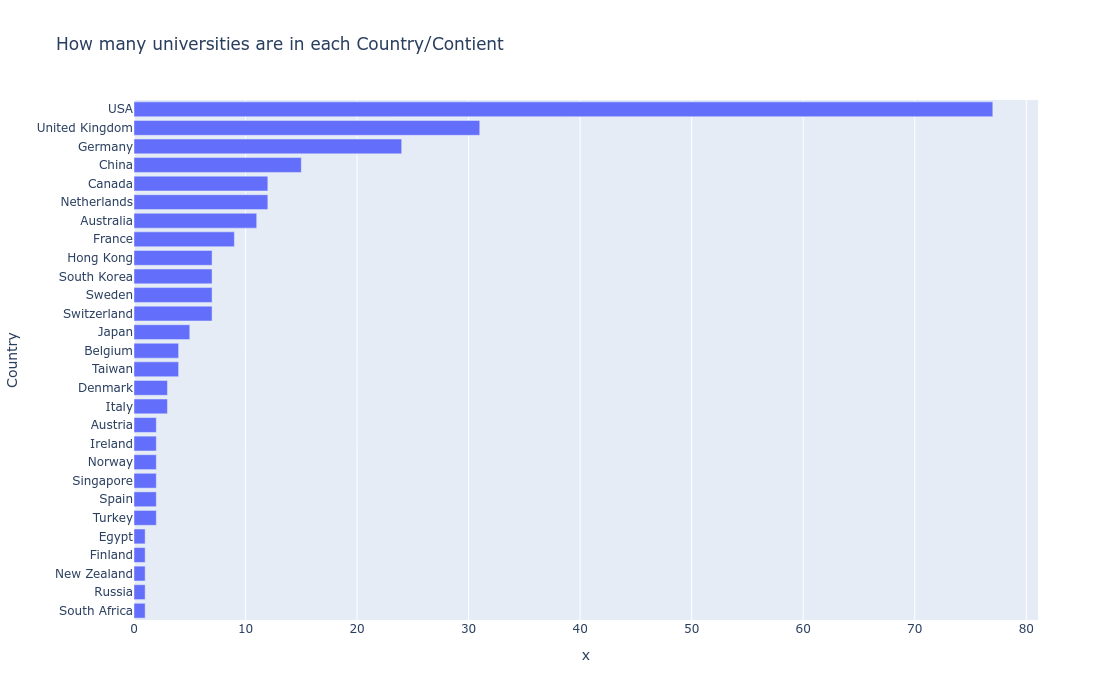

In [26]:
#create a bar chart showing the counts

fig = px.bar(cnt, y=cnt.index, x=cnt.values, height= 700, width =600, title= "How many universities are in each Country/Contient"
)
fig.update_yaxes(
    categoryorder='total descending',  # Sort countries by count (ascending)
    autorange="reversed"  # Reverse the Y-axis to show the highest count at the top
)

fig.show()

How have the university rankings changed since 2011?

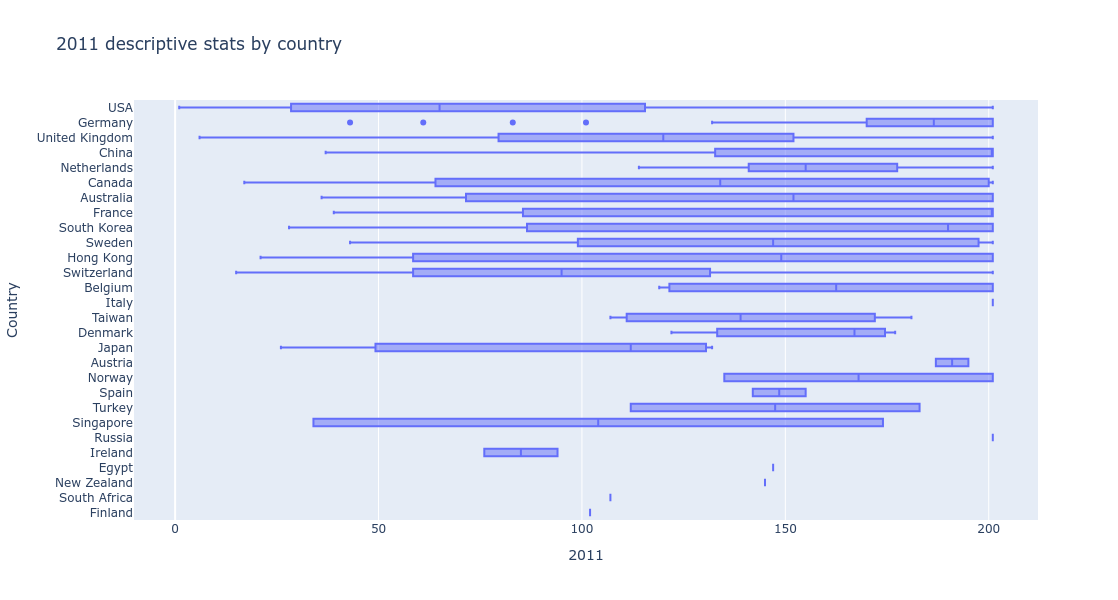

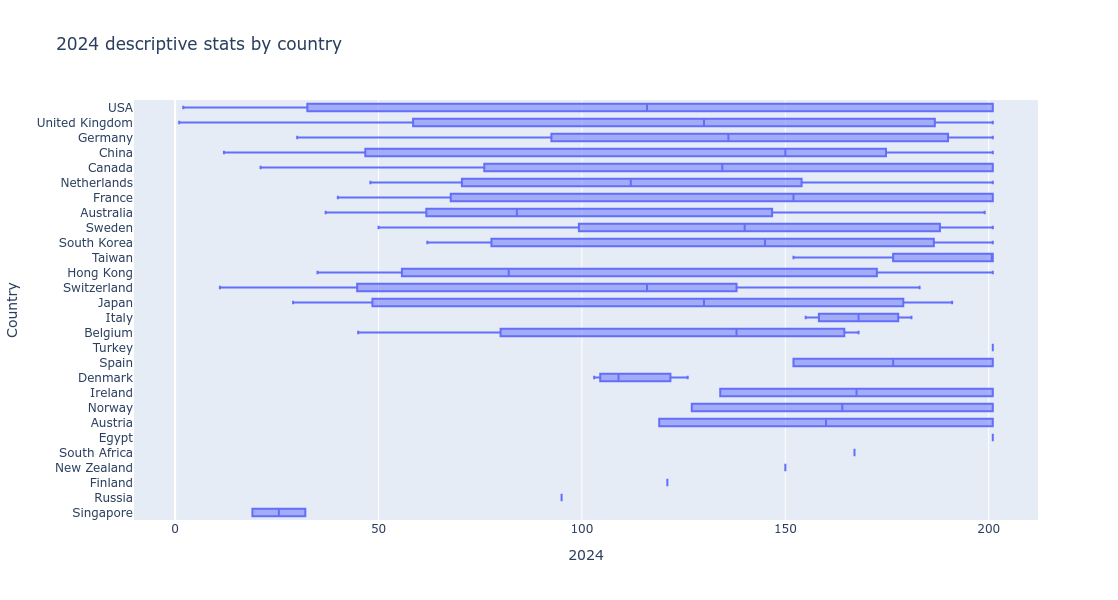

In [27]:
# look at the IQR, median, max, min by country-- looking for anything noticeable 

fig2011 = px.box(df, x='2011', y= z, title="2011 descriptive stats by country",height=600, width =600)
fig2011.update_yaxes(
    categoryorder='total descending',  
    autorange="reversed" 
)
fig2024 = px.box(df, x='2024', y= z, title="2024 descriptive stats by country",height=600, width =600)
fig2024.update_yaxes(
    categoryorder='total descending',  
    autorange="reversed"  
)

fig2011.show()
fig2024.show()

In [28]:
#calculate the average score for each country by year.  

country_avg_rank = df.groupby('Country')[
    ['2011', '2012', '2013', '2014', '2015', '2016', 
     '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
].mean()

country_avg_rank = country_avg_rank.reset_index()


In [29]:
#filter to countries with >7 universities in the top 10

country_avg_rank = country_avg_rank[country_avg_rank['Country'].isin(['Australia', 'Canada','USA','United Kingdom','Germany','China','Netherlands','France','Hong Kong','South Korea','Sweden','Switzerland'])]




In [30]:
#reorder the data to put into a line chart

country_avg_rank = country_avg_rank.melt(
    id_vars=['Country'], 
    var_name='Year',       
    value_name='Rank'     
)



In [31]:
#filter data to show 2011 and 2024
country_avg_rank = country_avg_rank[country_avg_rank['Year'].isin(['2011', '2024'])]



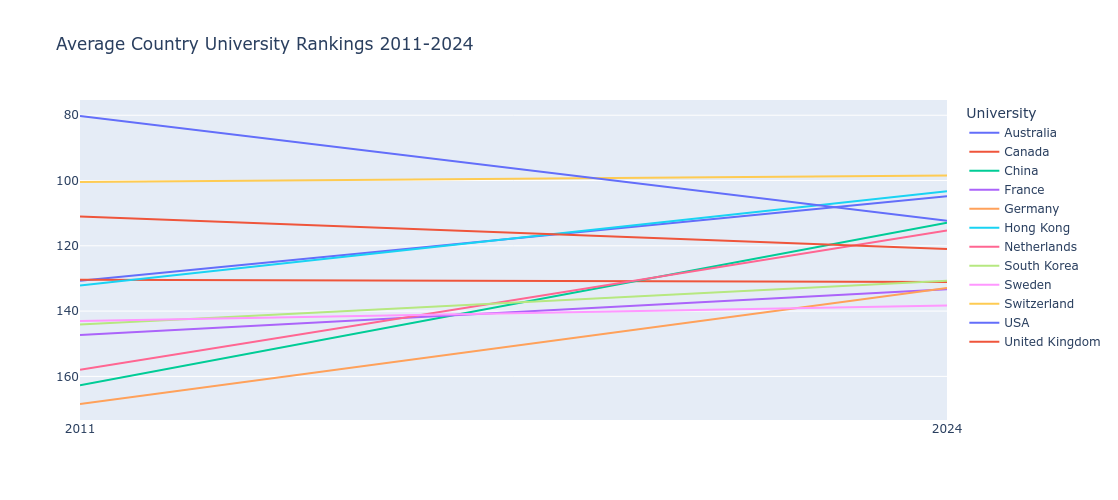

In [32]:
#create a line graph showing the change in average university rankings by country from 2011 to 2024

figcnt = px.line(
    country_avg_rank,
    x='Year',  # X-axis: Year
    y='Rank',  # Y-axis: Value
    color='Country',#,color_discrete_sequence=px.colors.sequential.Greens,
    title = 'Average Country University Rankings 2011-2024',
    height= 500,
    width= 1000
)

figcnt.update_layout(
    showlegend=True,
    xaxis_title='',
    yaxis_title='',
    legend_title='University',
    hovermode='x unified',
    xaxis=dict(
        autorange=True # Invert the Y-axis
    ),
    yaxis=dict(
        autorange= 'reversed', # Invert the Y-axis
        range=[1, 200]
    ) 
)
figcnt.show()

How have individual countries performed? Which Universities have gone up in rank; which have gone down

In [33]:
#calculating ave change from 2011 to 2024. Categorise by improve or decline.
df['ave_change'] = df['2011'] - df['2024']
df['imp_dec'] = np.where(df['ave_change'] > 0, 'improve', 'decline')

In [34]:
#
df_melt = df.melt(
    id_vars=['Country','University','Continent','ave_change','imp_dec'], 
    var_name='Year',       # Name for the new column containing years
    value_name='Rank'      # Name for the new column containing ranks
)



In [35]:
#filtering the data to look at the counties and years we want to look at


q= 'USA' #nominate county as a variable 

df_melt = df_melt[df_melt['Country'] == q]
df_melt = df_melt[df_melt['imp_dec'] == 'decline']  #look at either improve or decline


In [36]:
#filter years
df_melt = df_melt[df_melt['Year'].isin(['2011', '2024'])]


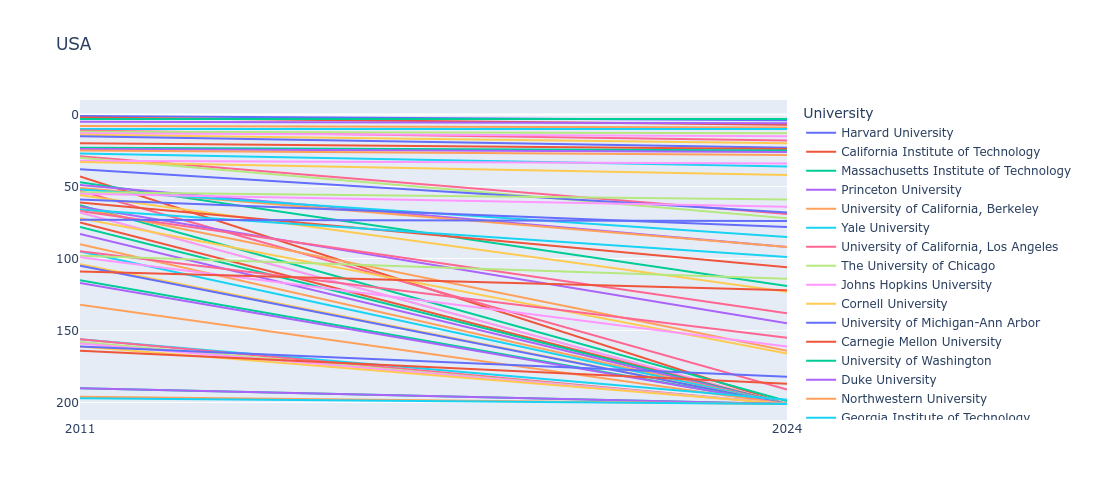

In [37]:
# Create the time series line graph for the countries change in rank 2011 to 2024
fig = px.line(
    df_melt,
    x='Year',  
    y='Rank', 
    color='University',
    title = f'{q}',
    height= 500,
    width= 1000
)

fig.update_layout(
    showlegend=True,
    xaxis_title='',
    yaxis_title='',
    legend_title='University',
    hovermode='x unified',
    xaxis=dict(
        autorange=True 
    ),
    yaxis=dict(
        autorange='reversed', 
        range=[1, 200]
    ) 
)

# Show the graph
fig.show()

US_dec = fig


